In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
984,2020-07-14,United Kingdom,290688.0,290133.0,45006.0,44830.0,555.0,176.0
985,2020-07-14,Germany,199308.0,198963.0,9076.0,9064.0,345.0,12.0
986,2020-07-14,Iran,260712.0,259652.0,12993.0,13032.0,1060.0,-39.0
987,2020-07-14,Turkey,213962.0,214001.0,5383.0,5382.0,-39.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2917.766430738119
RMSE =  7251.477488374938


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.83013144590495
RMSE =  700.0875959925941


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  14764.614583333334
RMSE =  19298.308235168784
-- World performances for deaths --
MAE =  1571.5729166666667
RMSE =  1902.3593164147514


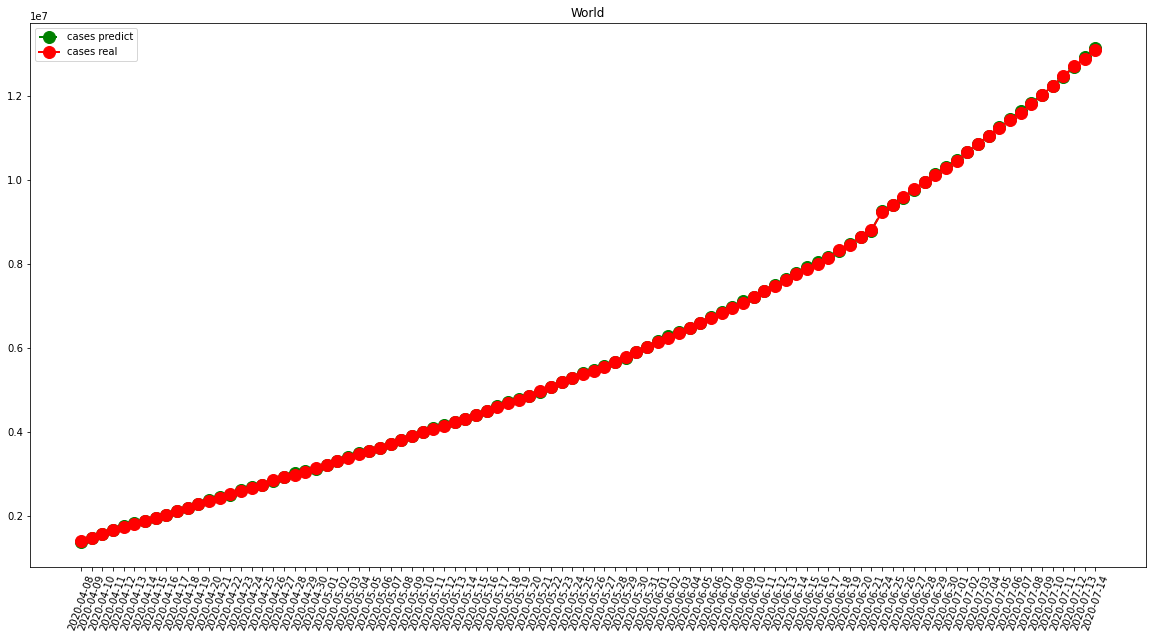

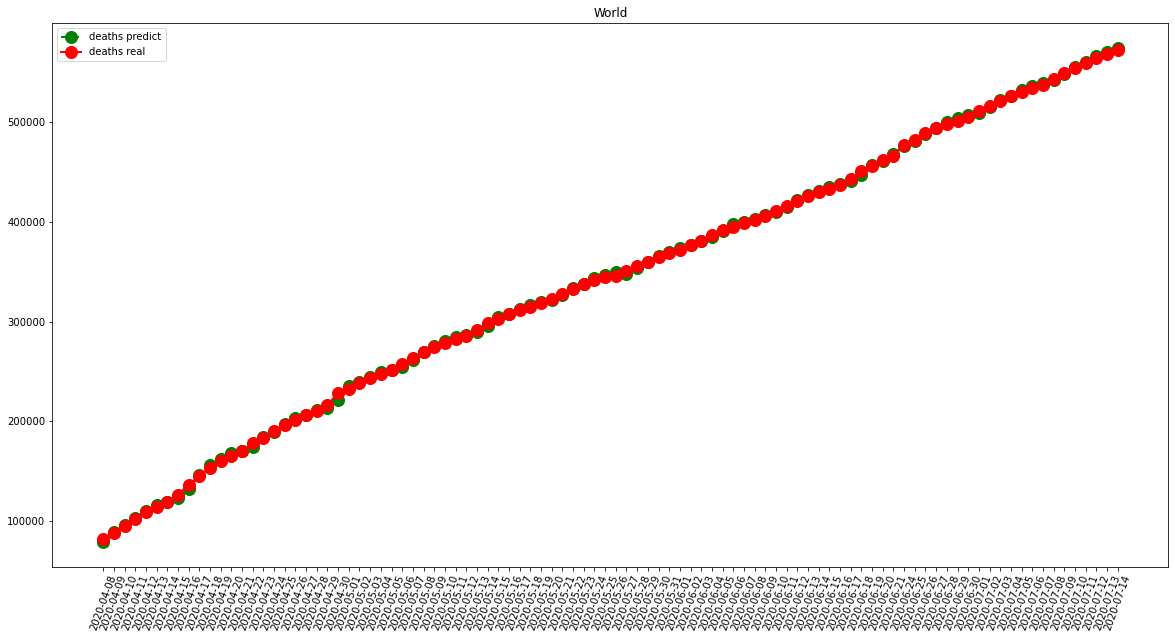

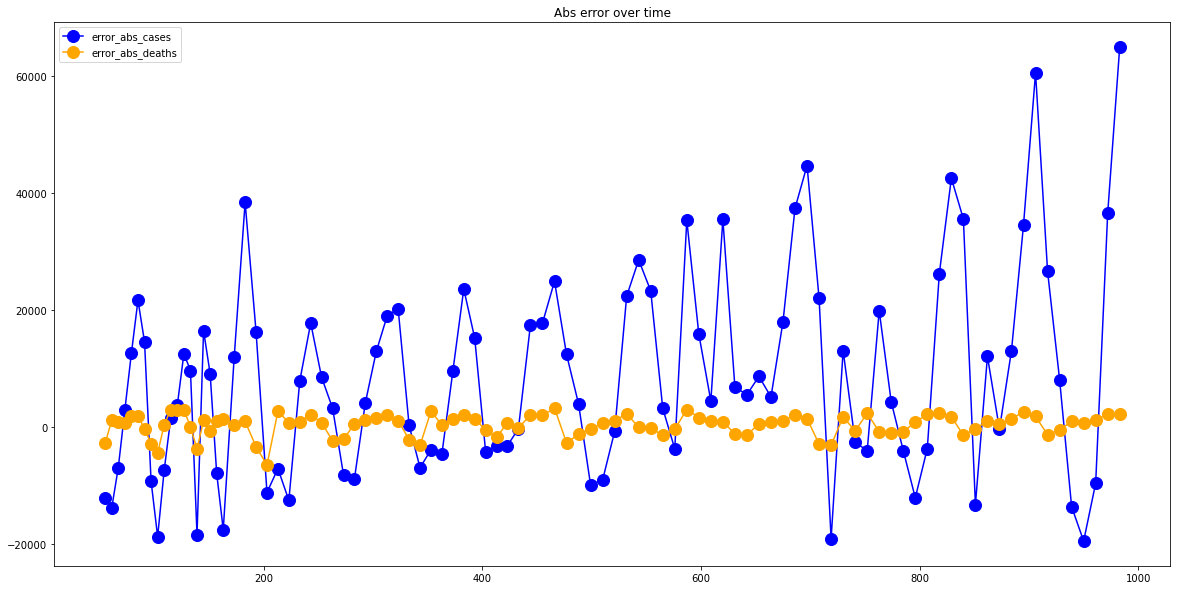

In [7]:
visShow("World")

-- France performances for cases --
MAE =  861.1698113207547
RMSE =  1418.0806587486416
-- France performances for deaths --
MAE =  167.30188679245282
RMSE =  325.35484257177677


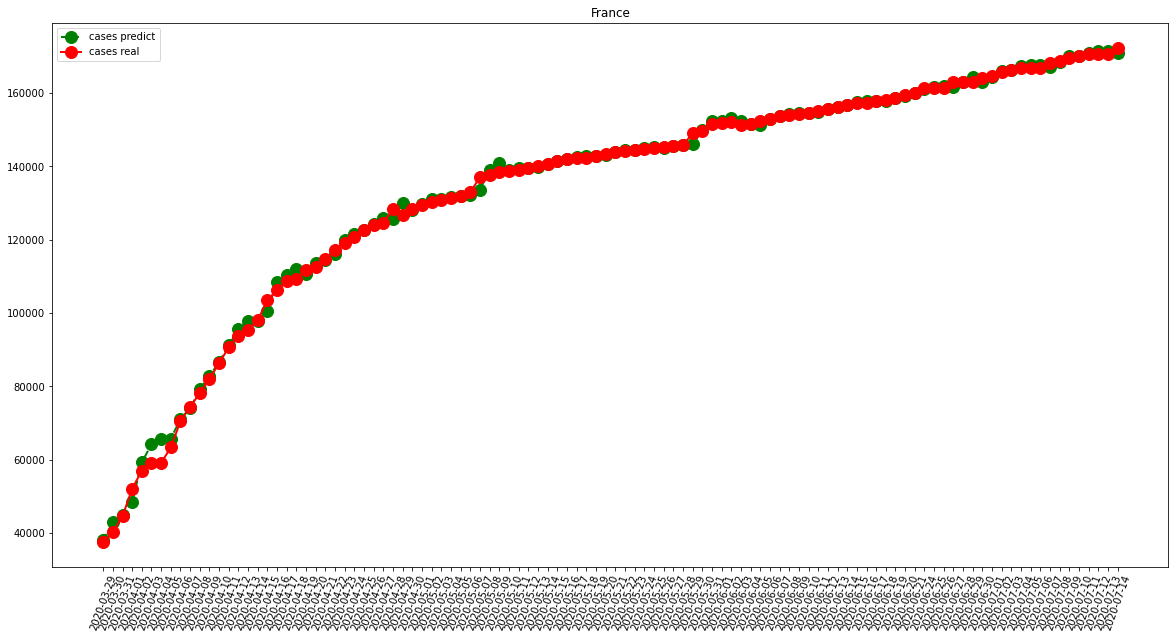

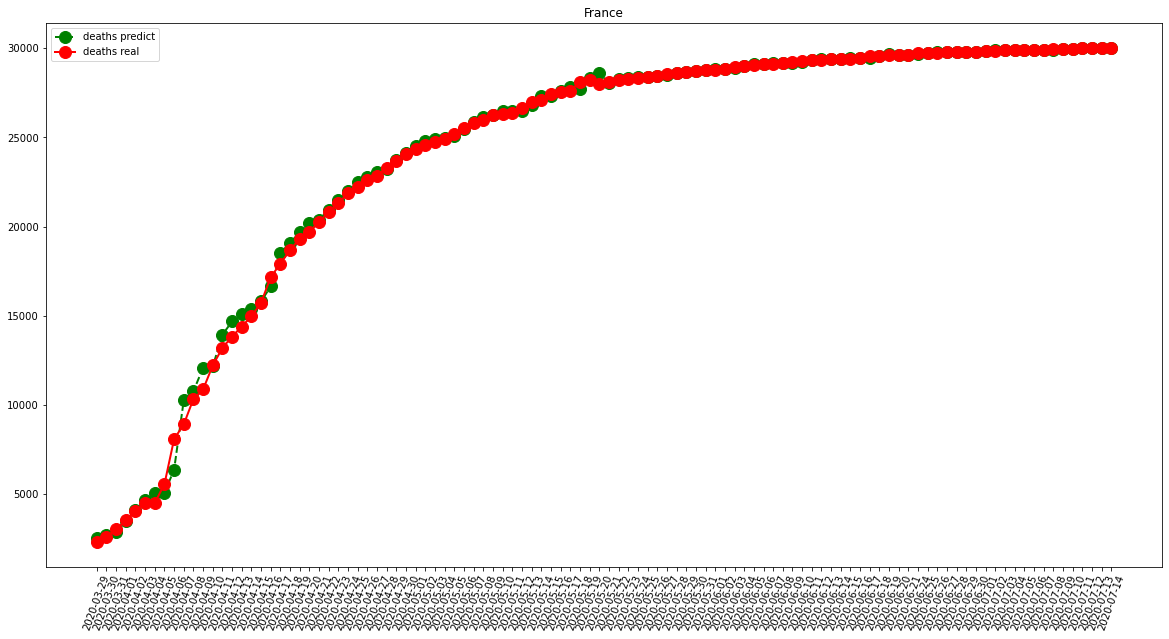

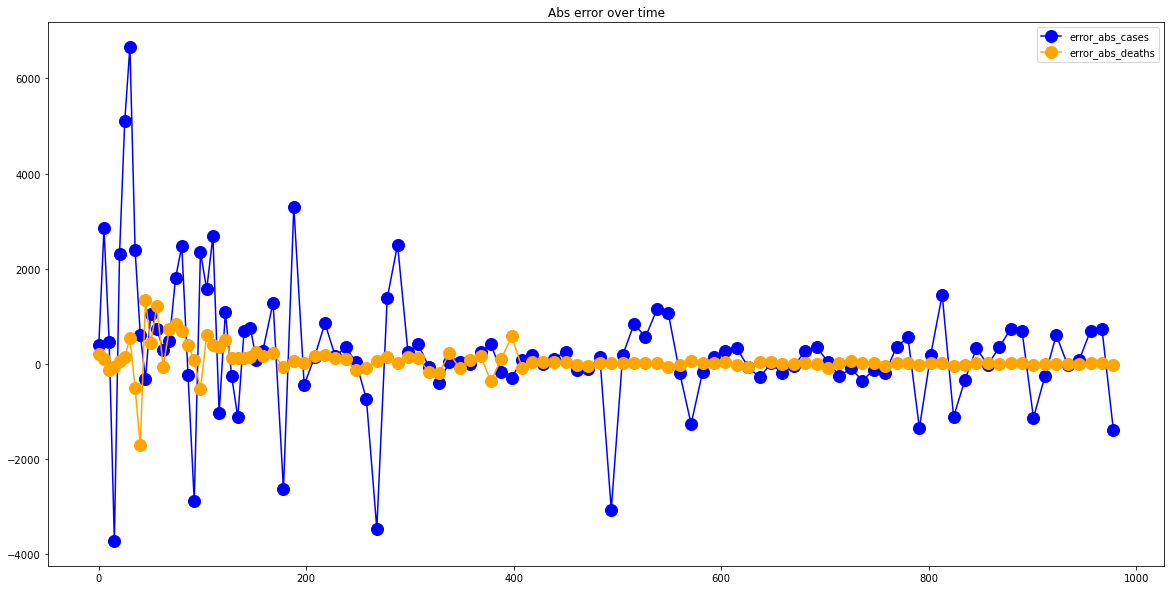

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  358.04716981132077
RMSE =  527.8255232734278
-- Italy performances for deaths --
MAE =  93.4245283018868
RMSE =  287.31244907978913


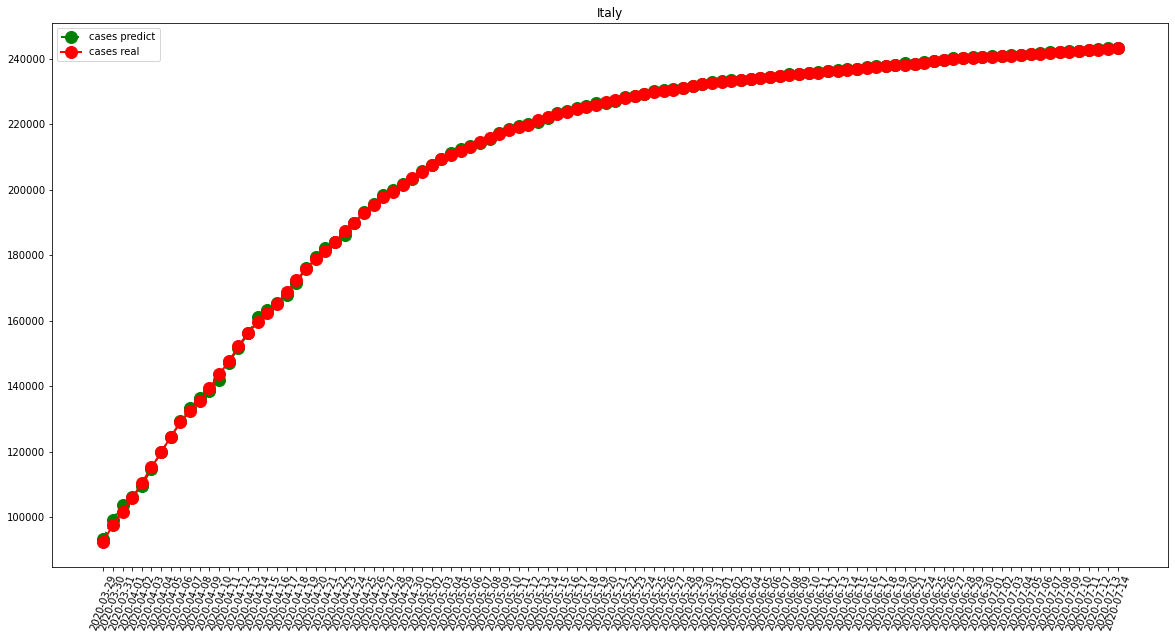

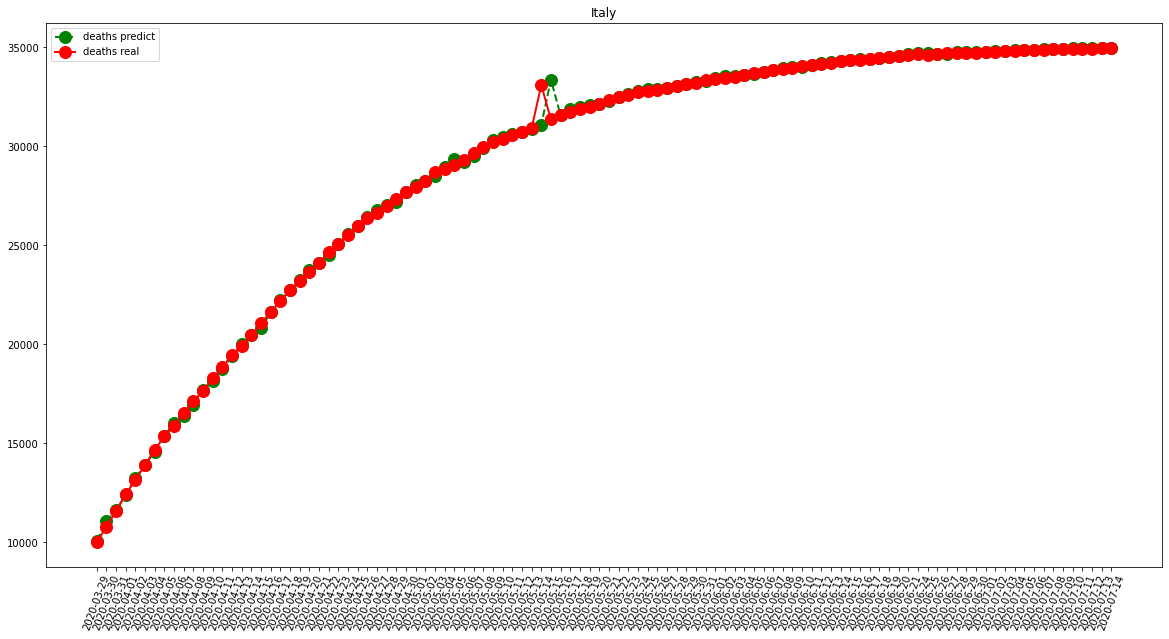

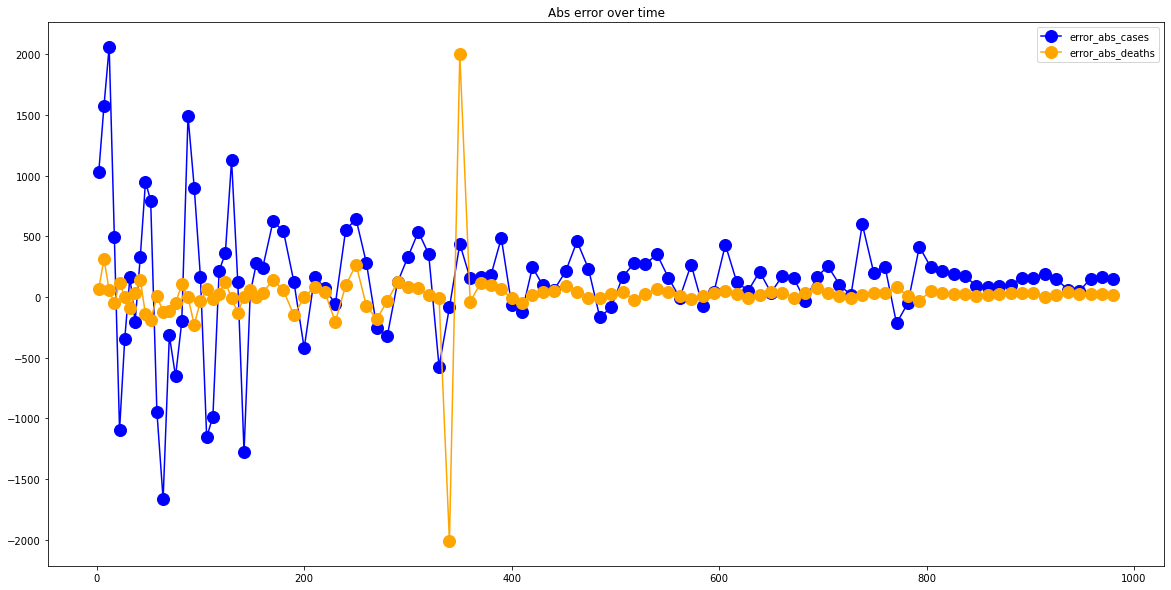

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  849.2641509433962
RMSE =  2002.9250685406778
-- Spain performances for deaths --
MAE =  171.91509433962264
RMSE =  394.2423950284087


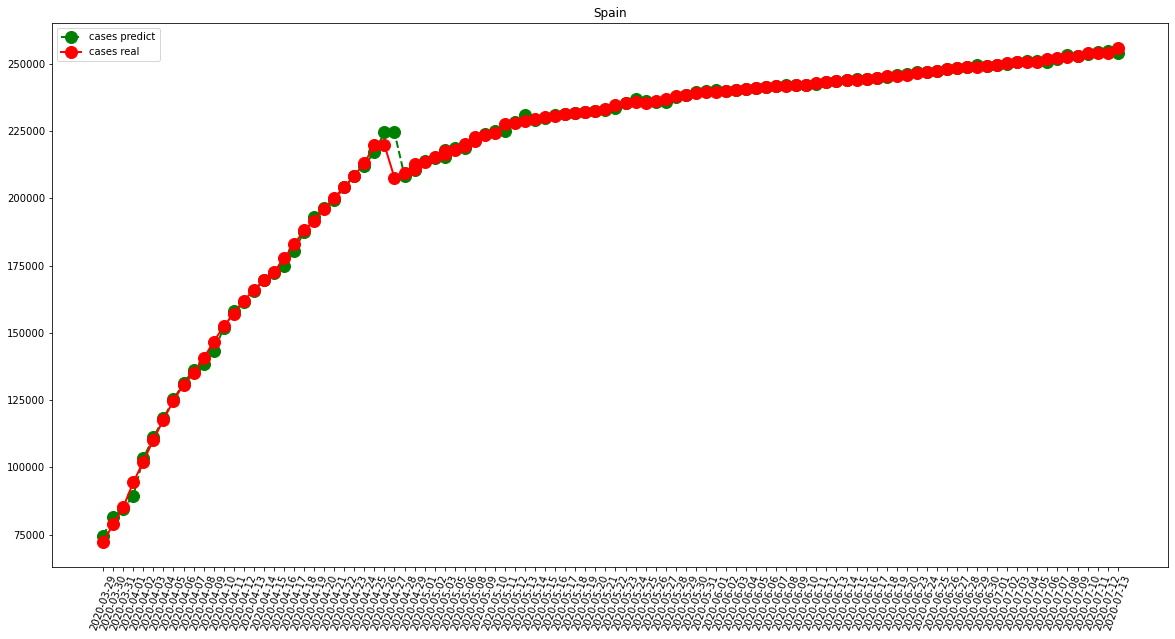

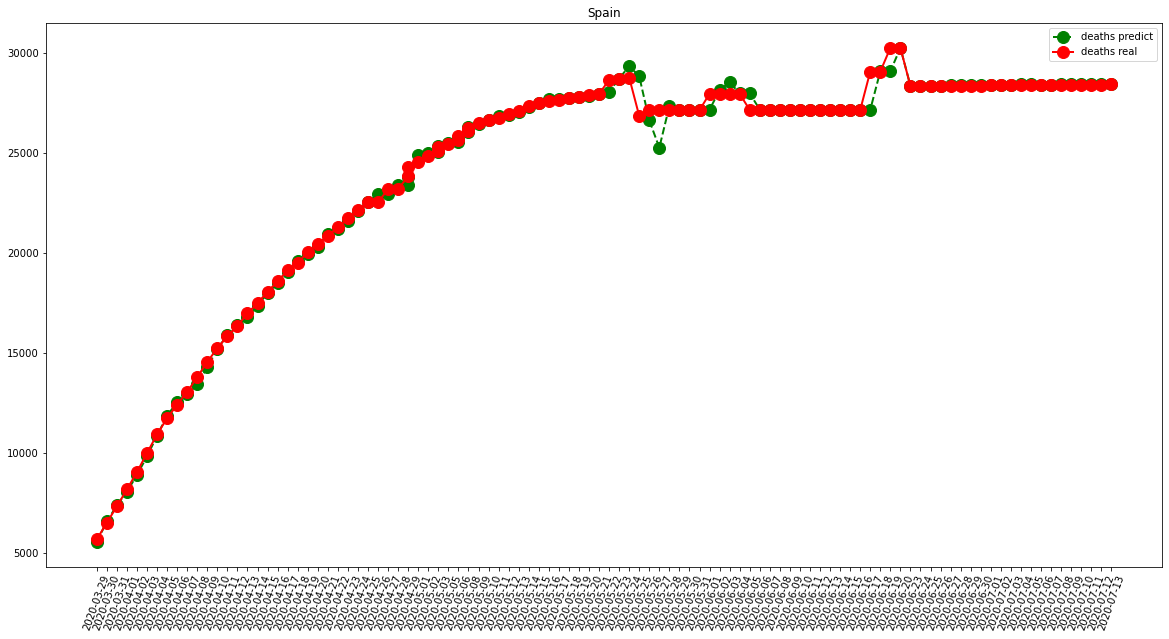

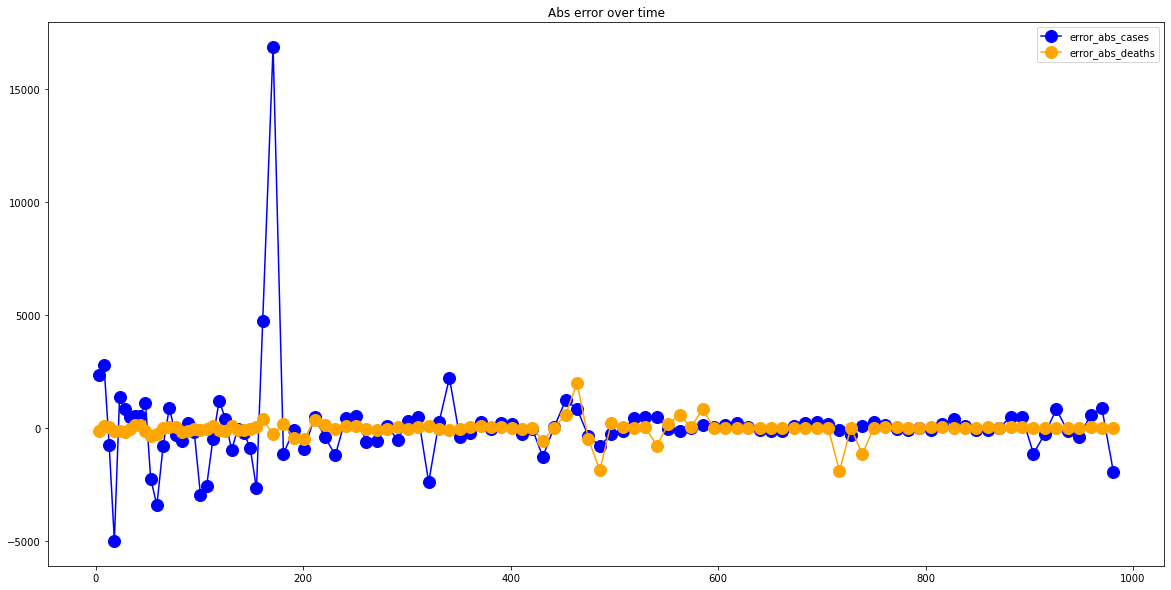

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5152.16037735849
RMSE =  7006.8747326370785
-- United States performances for deaths --
MAE =  526.2358490566038
RMSE =  764.5165632422218


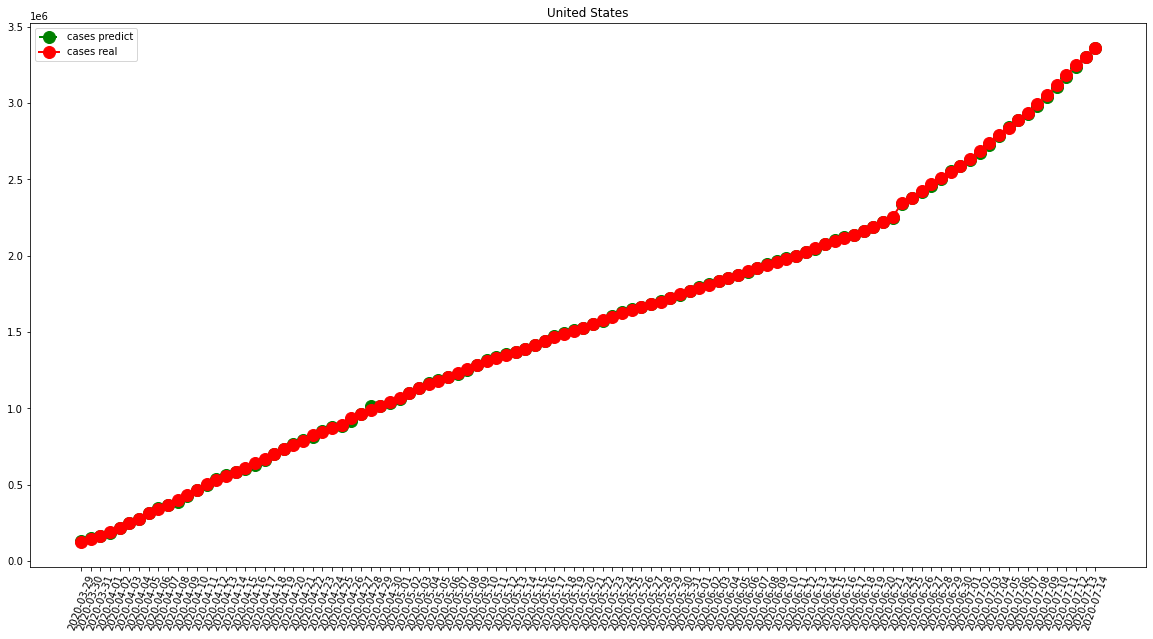

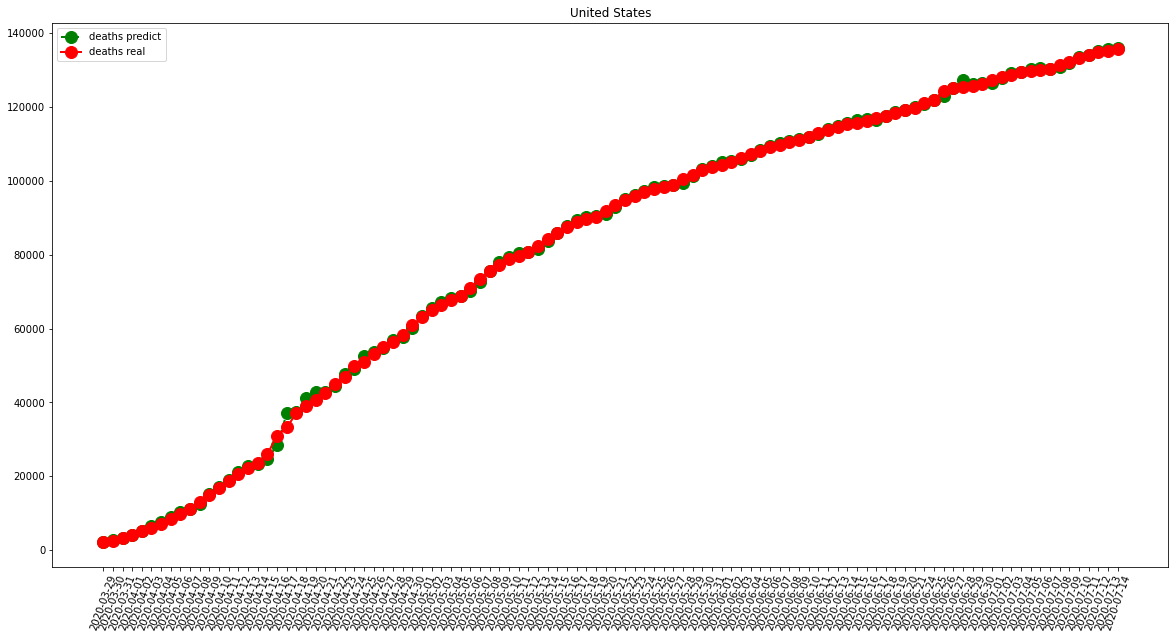

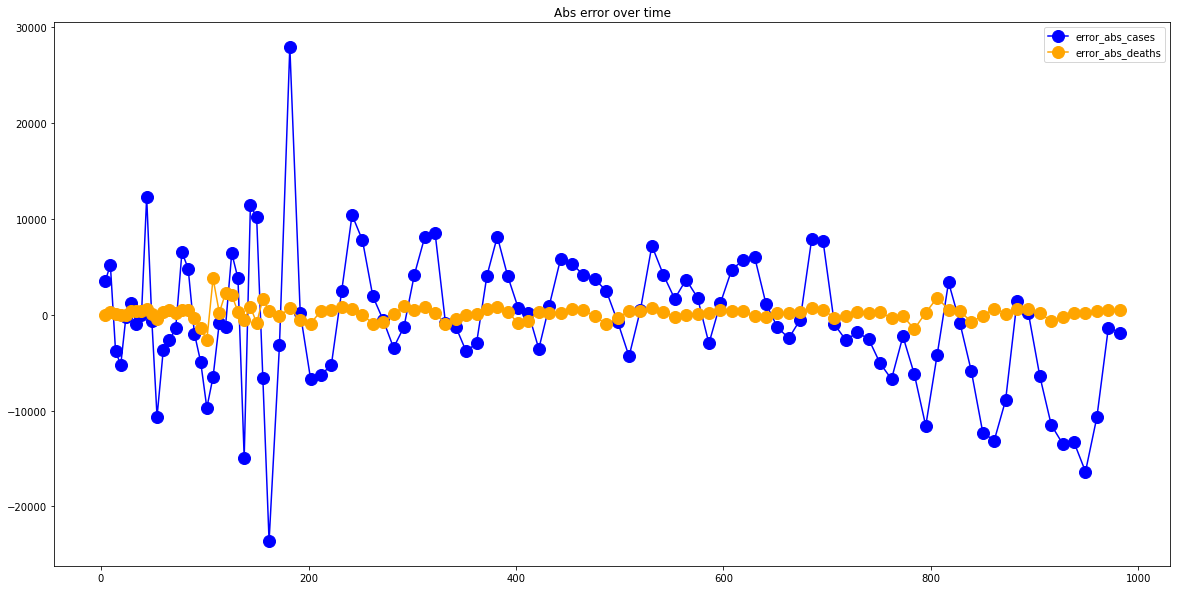

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  85.26415094339623
RMSE =  114.59263369917461
-- China performances for deaths --
MAE =  36.75471698113208
RMSE =  152.45902635456233


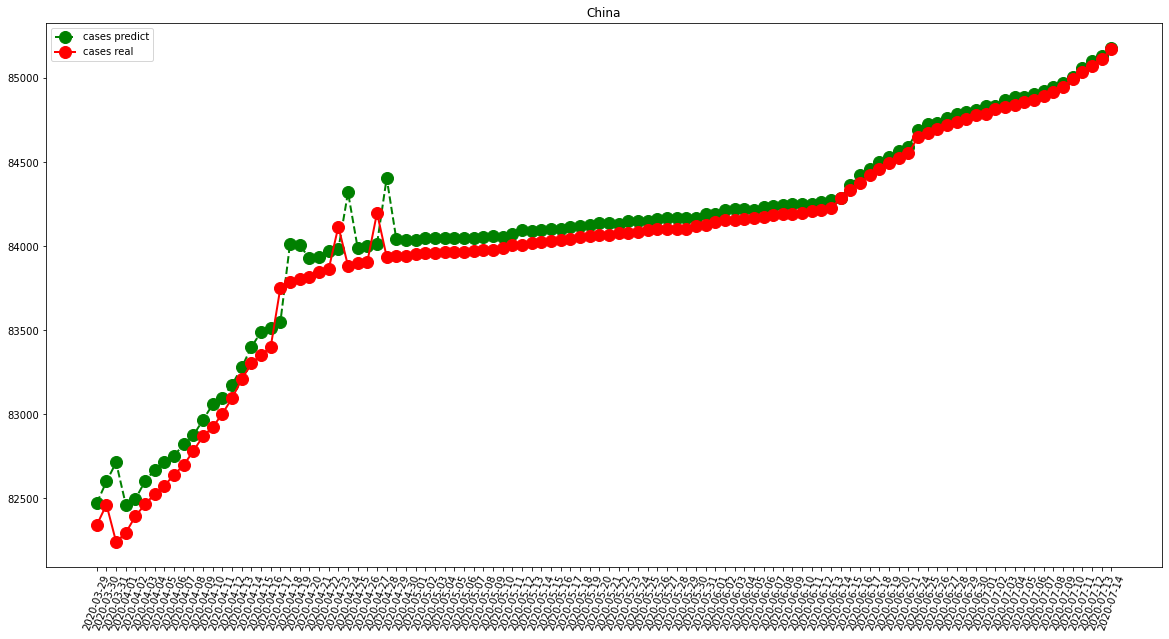

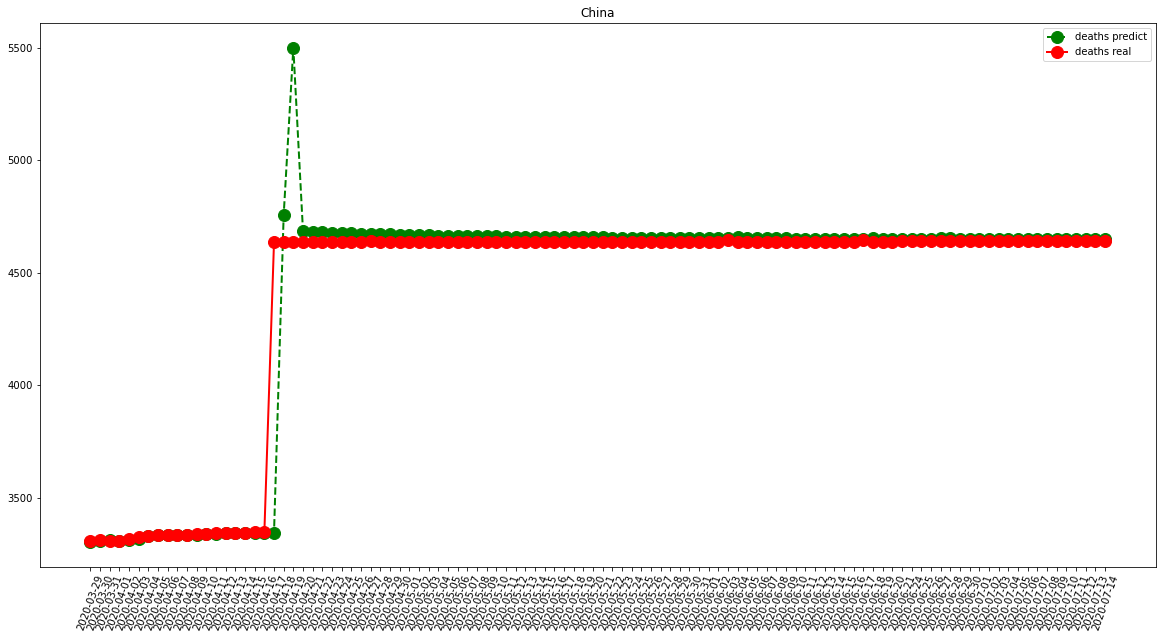

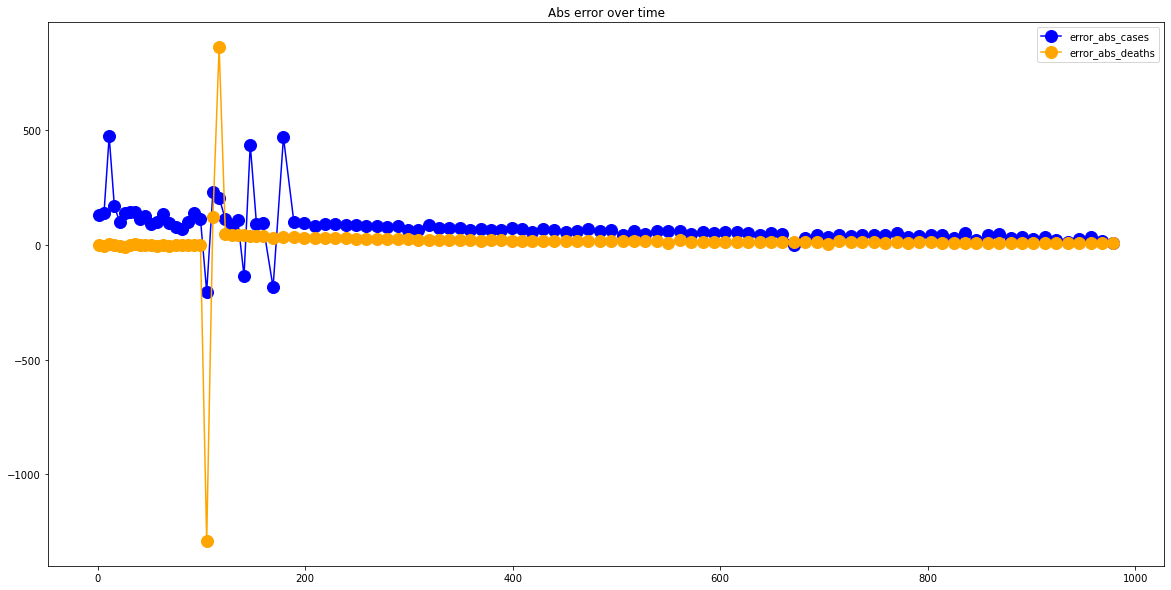

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1500.179487179487
RMSE =  4722.680399290868
-- United Kingdom performances for deaths --
MAE =  231.96153846153845
RMSE =  554.550719051017


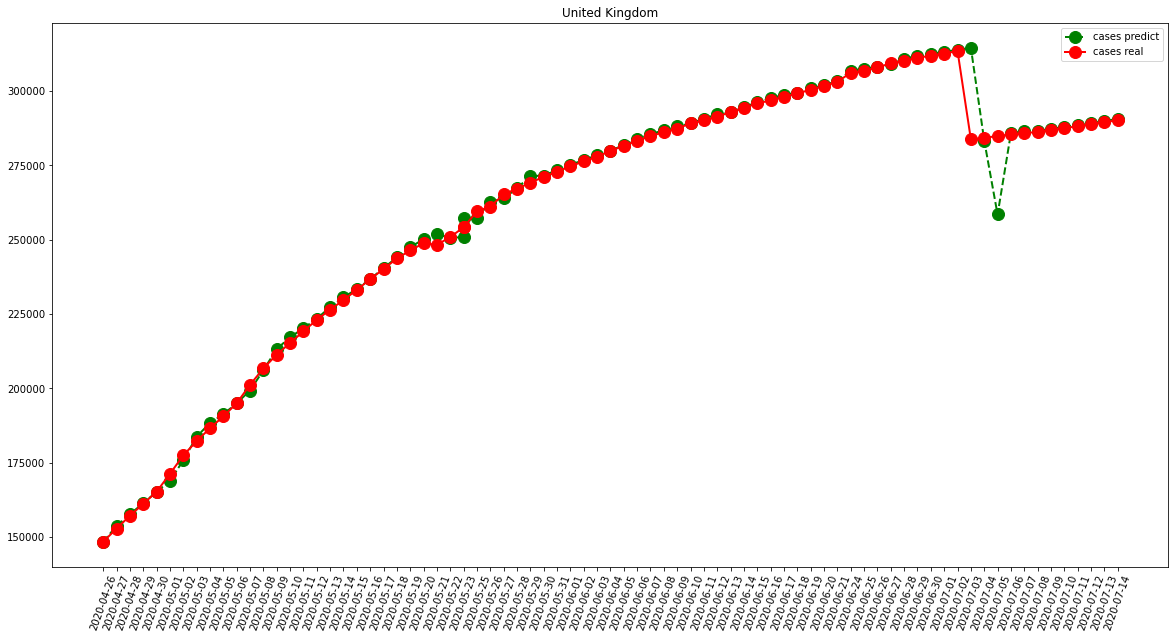

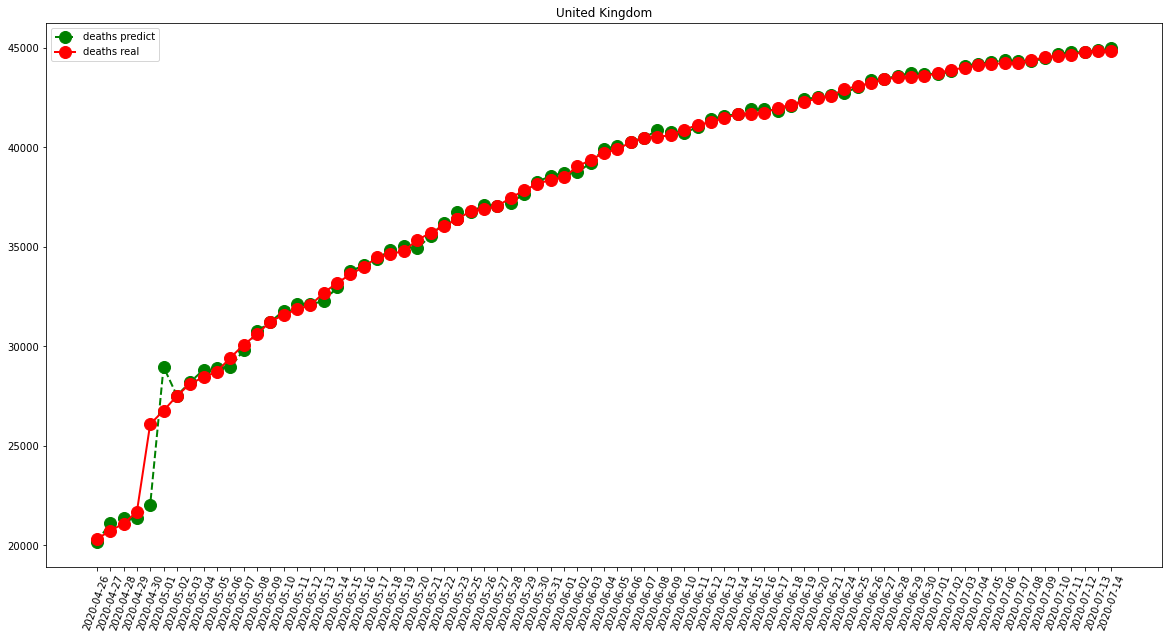

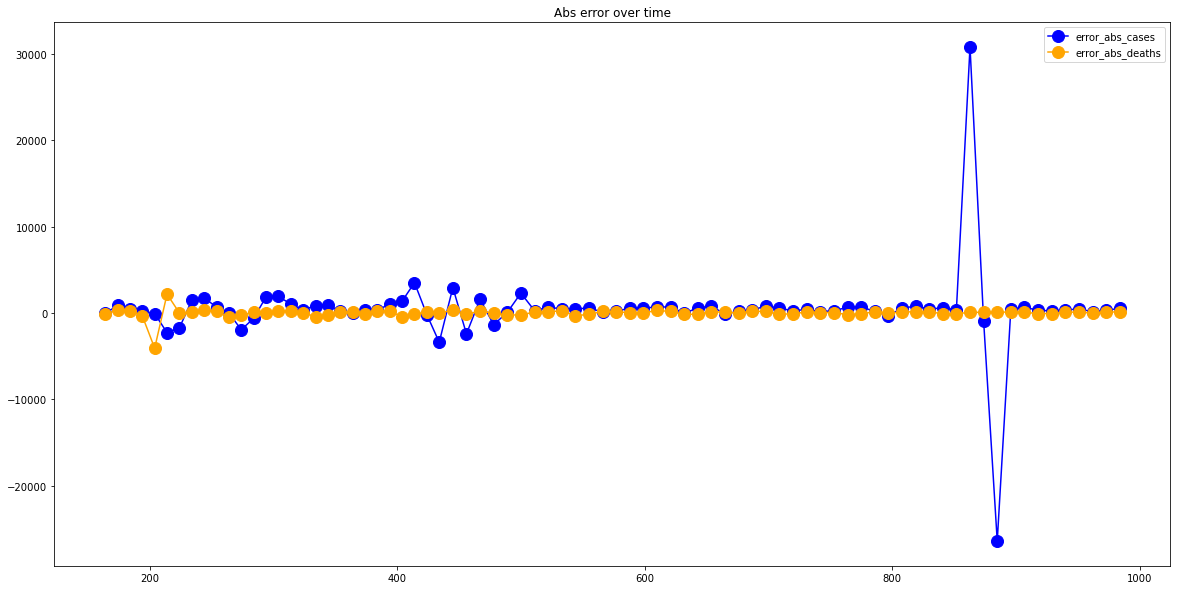

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  297.6923076923077
RMSE =  423.44106240813886
-- Germany performances for deaths --
MAE =  29.435897435897434
RMSE =  49.3392234875963


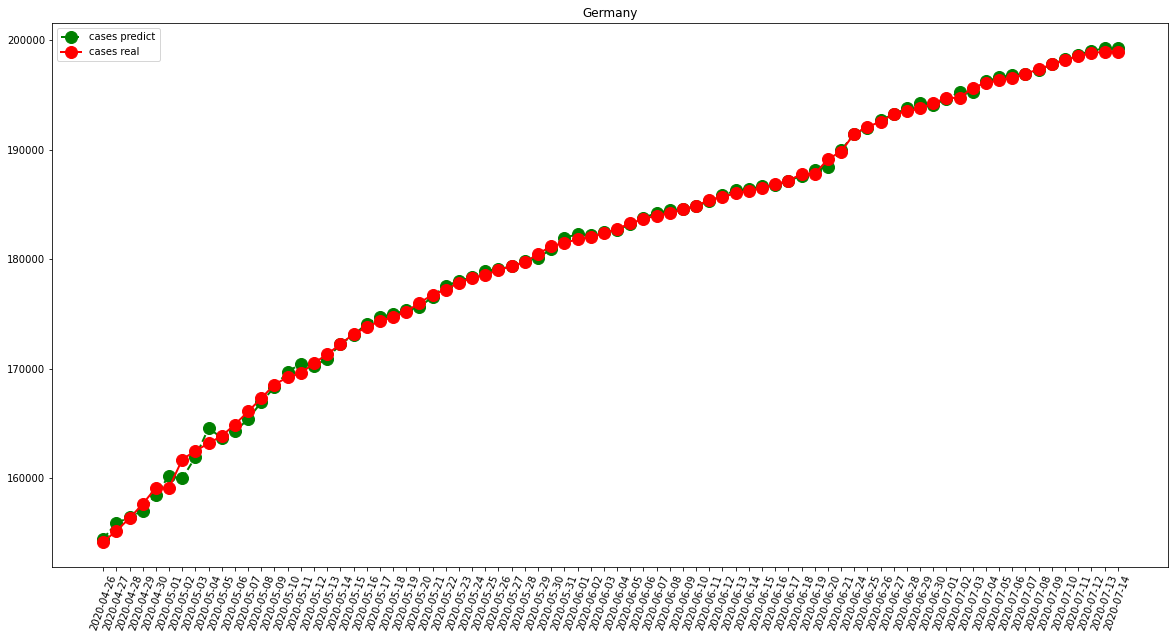

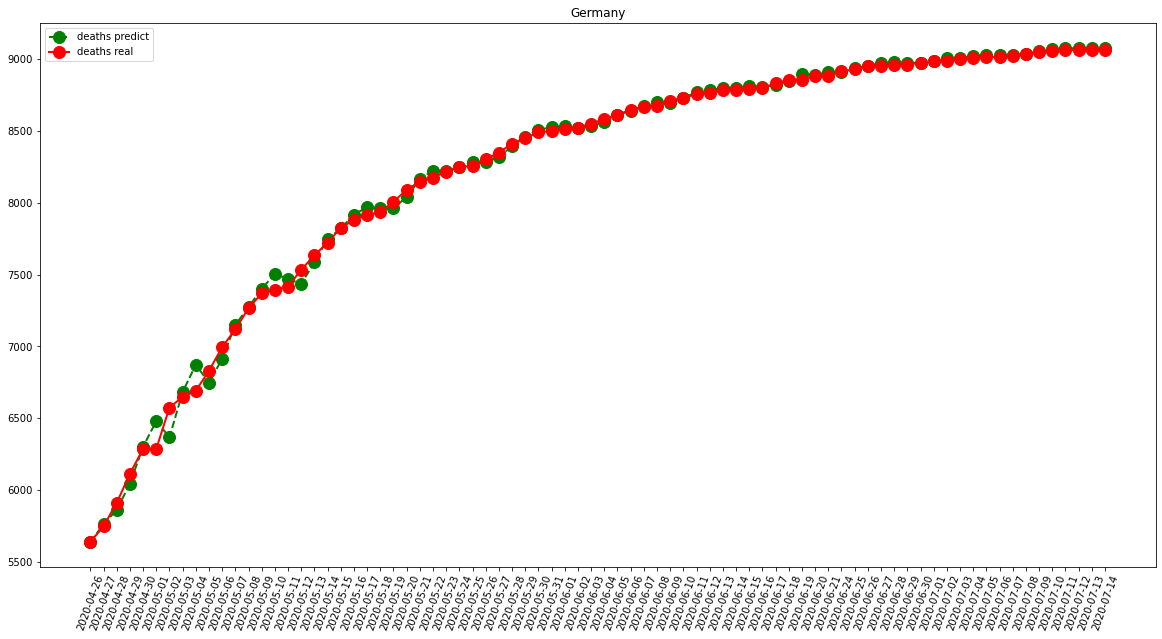

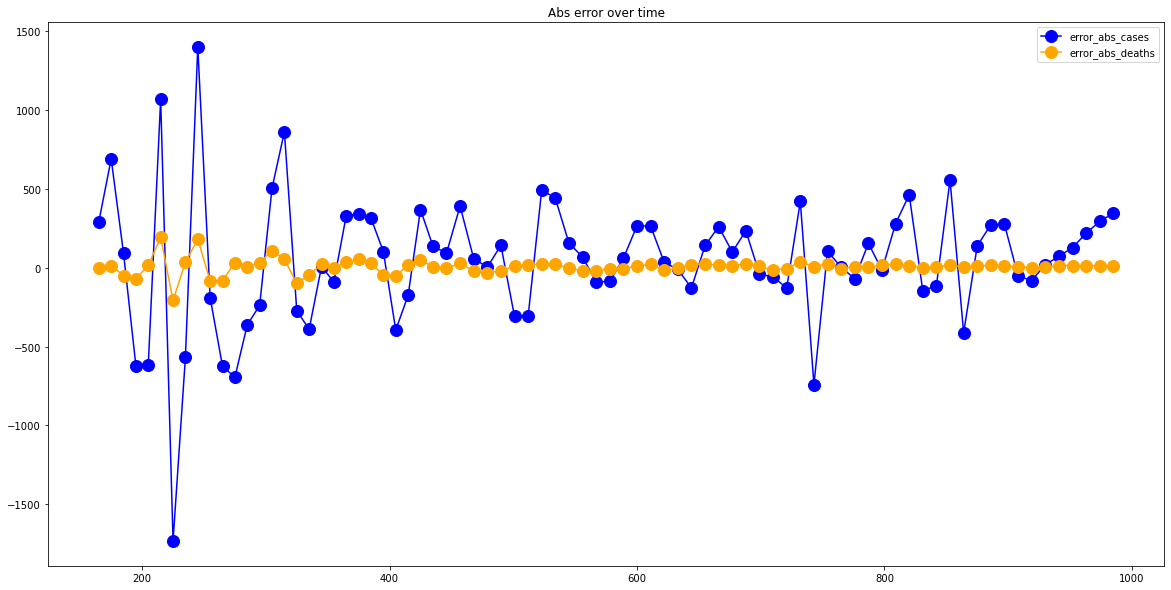

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  352.20512820512823
RMSE =  459.57399448865294
-- Iran performances for deaths --
MAE =  19.03846153846154
RMSE =  29.978838690495824


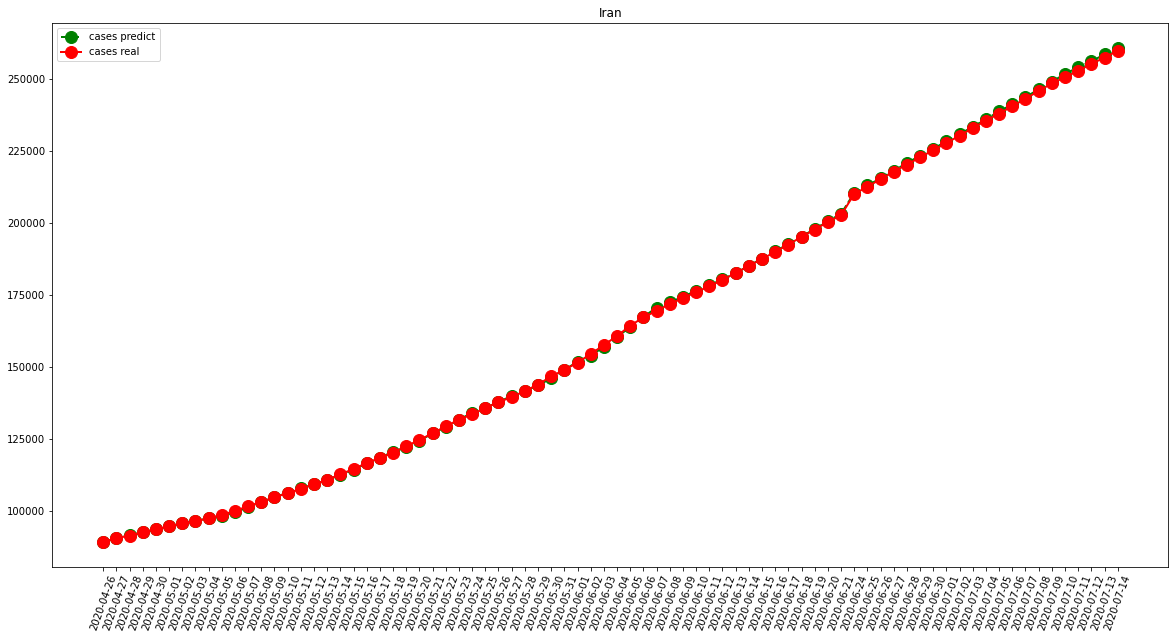

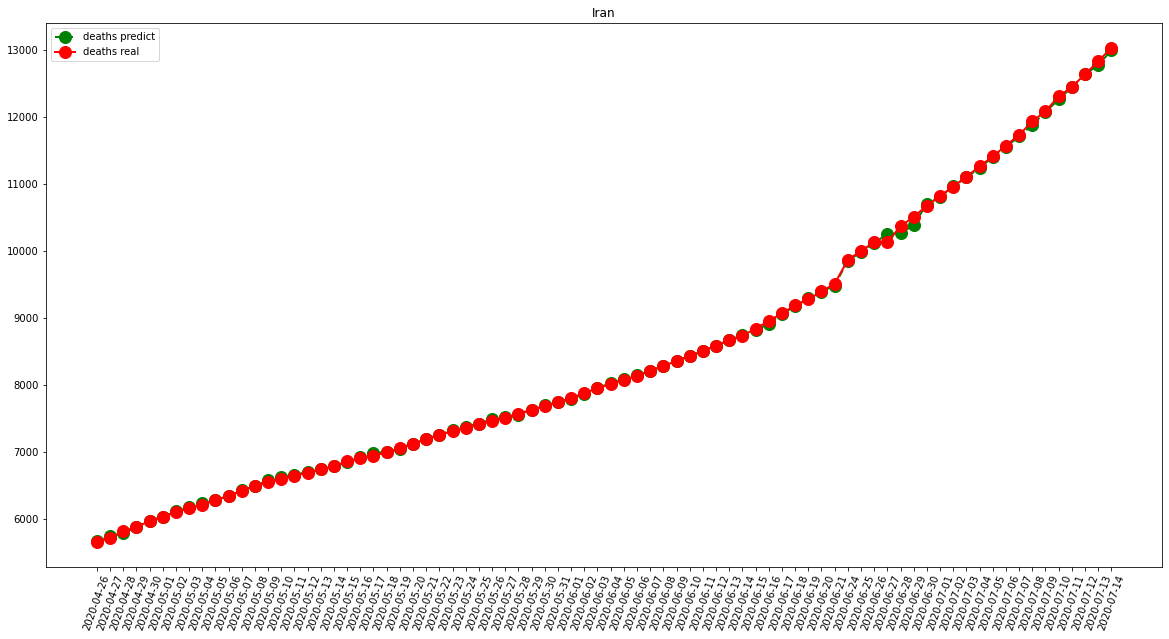

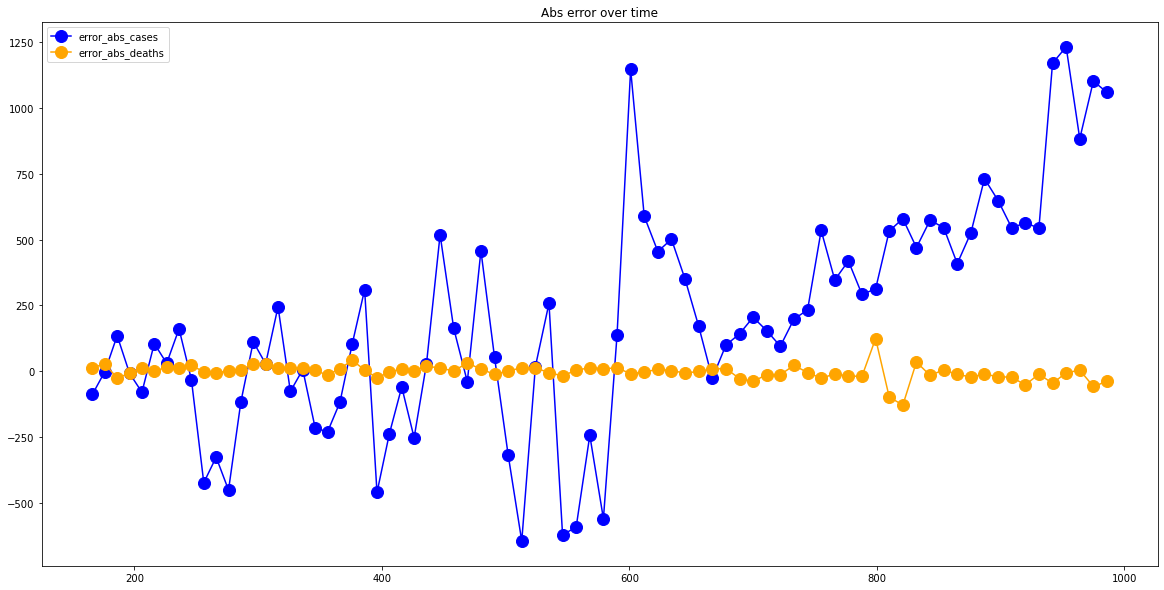

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  241.32051282051282
RMSE =  388.8908125715547
-- Turkey performances for deaths --
MAE =  23.78205128205128
RMSE =  114.93236584160582


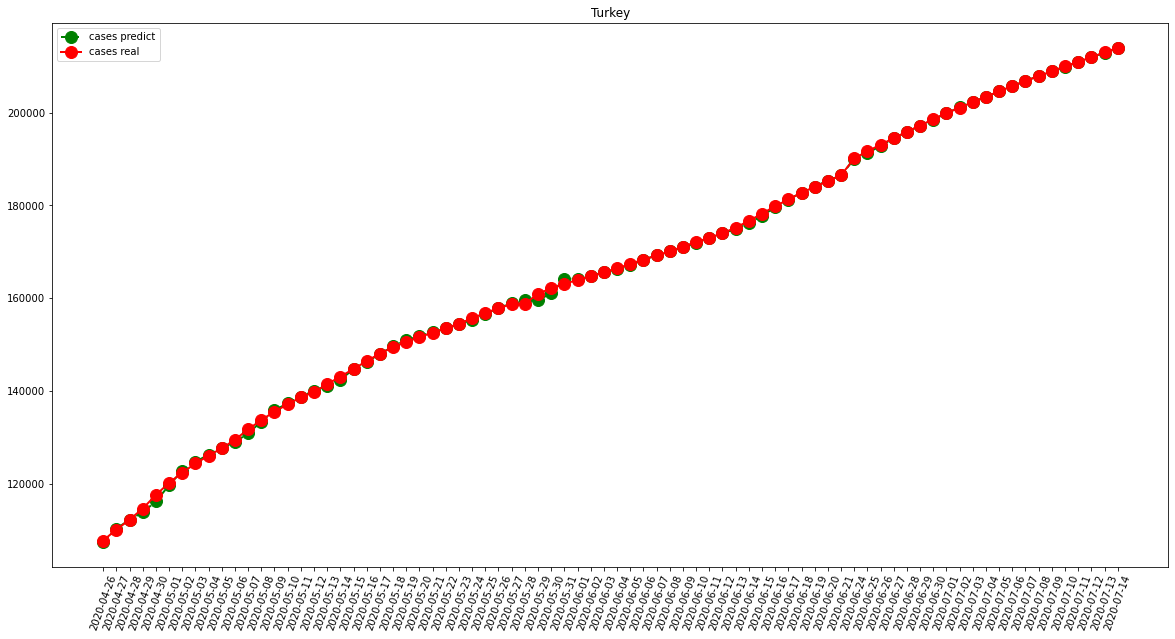

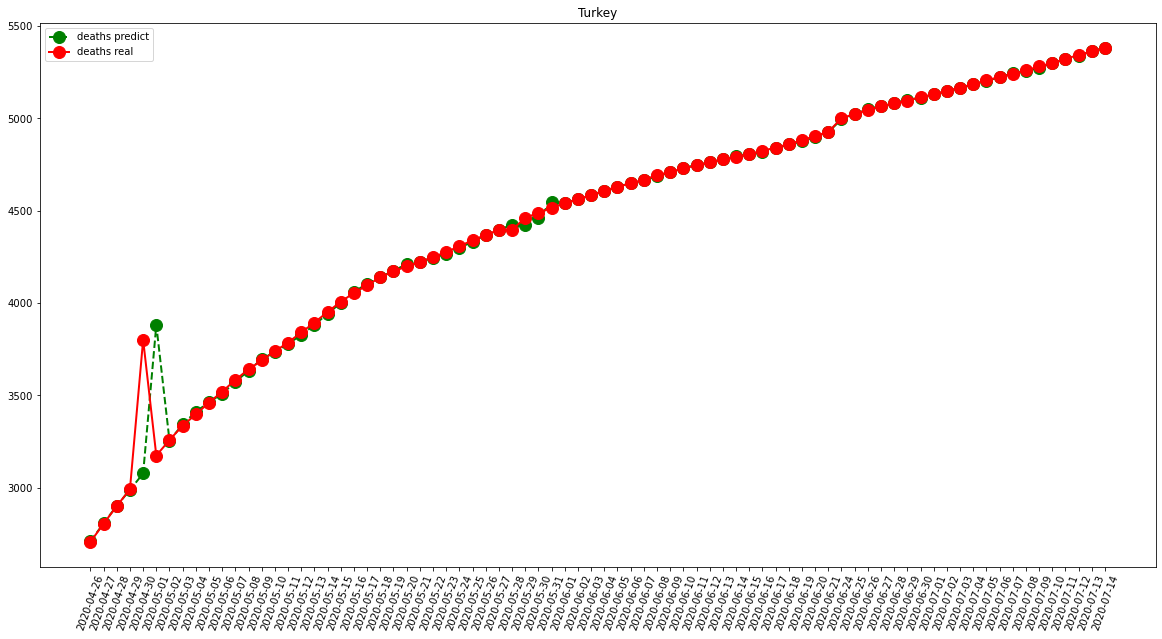

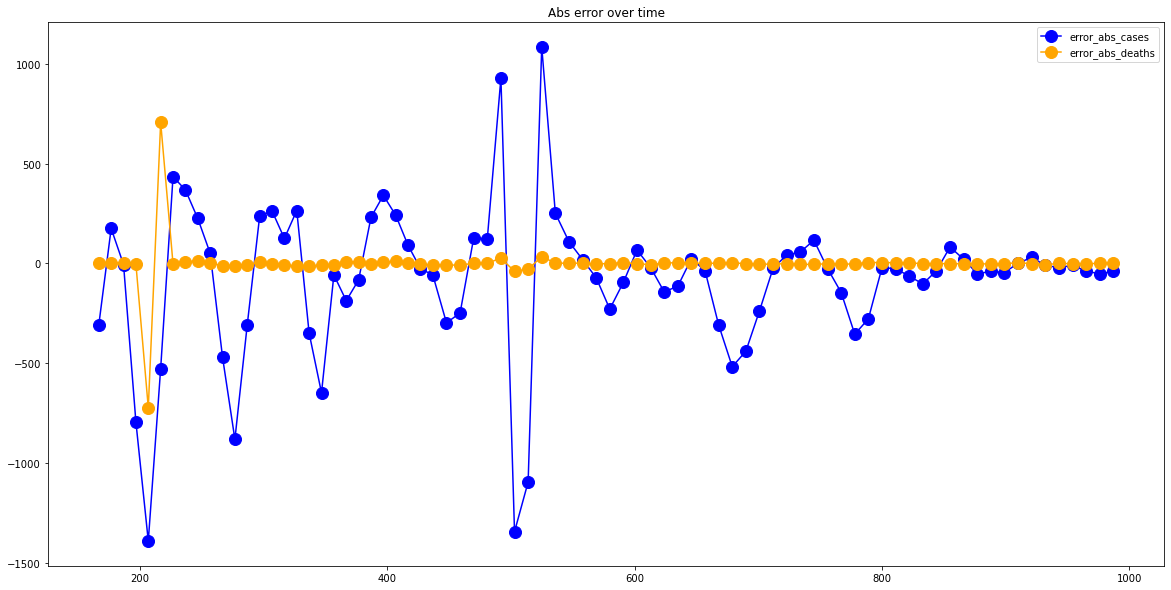

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9947.313725490196
RMSE =  12983.589132620682
-- Brazil performances for deaths --
MAE =  379.6470588235294
RMSE =  467.9381138904722


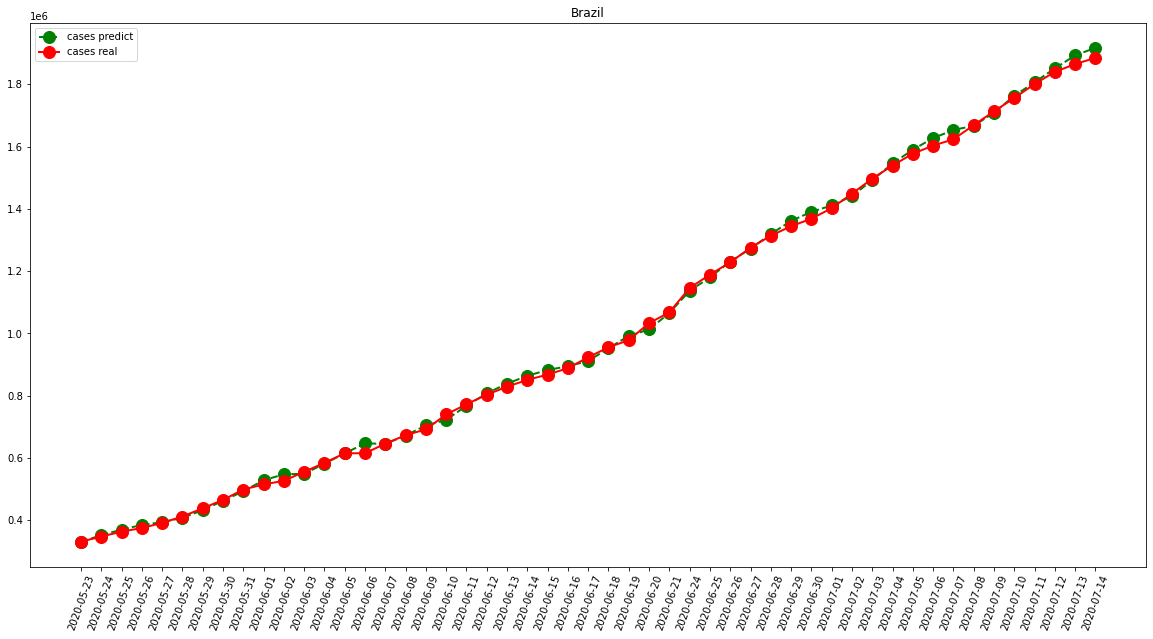

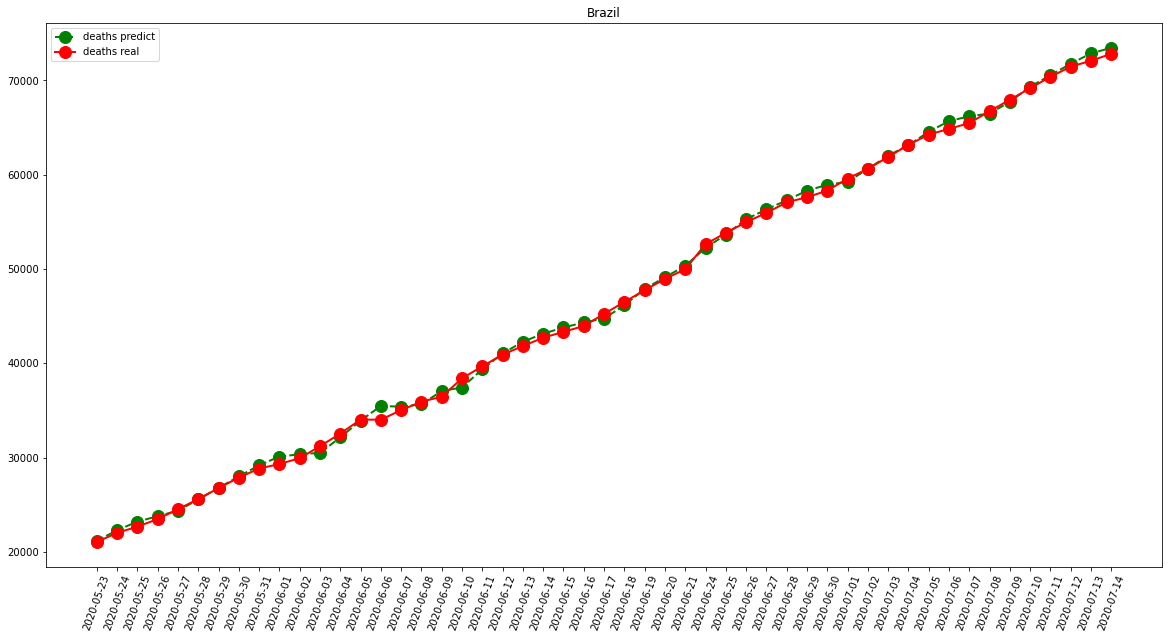

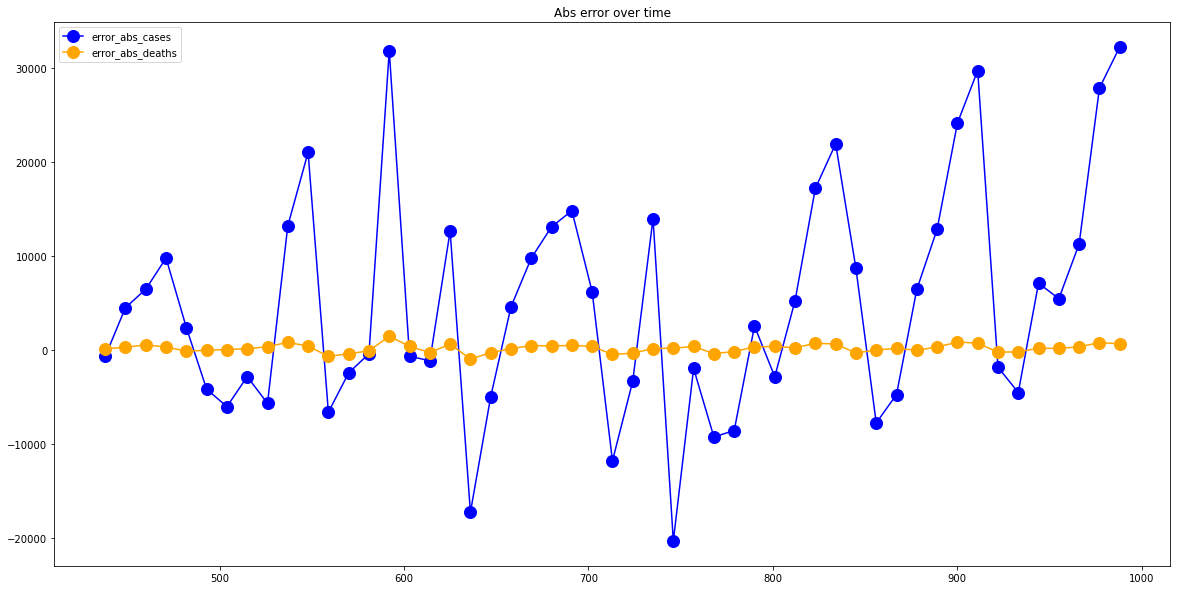

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)